In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4', 'vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
tourist = pd.read_excel('tourist_restaurant_reviews_2.xlsx')


In [3]:
tourist_1 = tourist.drop(['ID', 'Review Date'], axis=1)


In [4]:
tourist_1.head()

,Location,Restaurant_type,Hotel/Restaurant name,Review
0,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""","If you are staying in Kata beach, this restaur..."
1,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""","This is an excellent value, high quality food ..."
2,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""",Of all the restaurants we have dined in over t...
3,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""",We ate here a few times during our stay at Kat...
4,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""",The staff here are so friendly and very pleasa...


In [5]:
tourist_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Location               2970 non-null   object
 1   Restaurant_type        2970 non-null   object
 2   Hotel/Restaurant name  2970 non-null   object
 3   Review                 2970 non-null   object
dtypes: object(4)
memory usage: 92.9+ KB


In [6]:
#Renaming a column
tourist_1.rename(columns = {'Hotel/Restaurant name' : 'Restaurant'}, 
                 inplace = True)

In [7]:
from nltk.stem.snowball import stopwords
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
#Checking for class imbalance
print('\n All Data Labels')
print(tourist_1.groupby('Restaurant_type').count())


 All Data Labels
                 Location  Restaurant  Review
Restaurant_type                              
Indian               1291        1291    1291
Thai                 1679        1679    1679


In [9]:
#Data preprocessing step functions
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

In [10]:
#Bag of words model gotten from the application of the preprocessing steps
tourist_1['Review'] = tourist_1['Review'].apply(preprocess_text)
tourist_1.head()

,Location,Restaurant_type,Restaurant,Review
0,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""","[stay, kata, beach, restaur, definit, worth, v..."
1,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""","[excel, valu, high, qualiti, food, restaur, wa..."
2,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""","[restaur, dine, previou, week, delici, authent..."
3,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""","[ate, time, stay, kata, beach, time, food, ama..."
4,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""","[staff, friendli, pleasant, noth, troubl, food..."


In [11]:
#Generation Of Term Frequency Matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tourist_1['Review'].map(' '.join))
X = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

X.head()

,00,0080,0081,0082,0083,0084,0085,0089,008a,008b,...,your,yr,yukino,yum,yummi,yummlici,zaw,zero,zona,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Splitting the data into training and test set
from sklearn.model_selection import train_test_split
y = tourist_1['Restaurant_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 99)

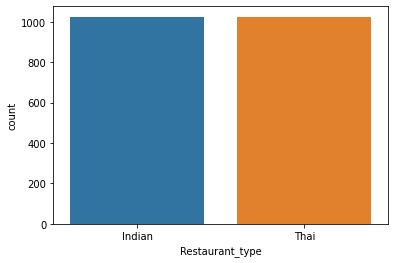

In [13]:
#Plotting the imbalanced class
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state= 0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)
sns.countplot(x=y_train_undersampled)


In [14]:
#Implementing naive bays
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_undersampled, y_train_undersampled)

MultinomialNB()

In [15]:
y_pred = model.predict(X_test)

#Computing the accuracy and making the confusion matrix
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print('-------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n',)
print(result)

accuracy:0.87


Confusion Matrix:
-------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

      Indian       0.86      0.86      0.86       266
        Thai       0.88      0.88      0.88       328

    accuracy                           0.87       594
   macro avg       0.87      0.87      0.87       594
weighted avg       0.87      0.87      0.87       594



In [16]:
#Generating a new column with the list comprehension
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [19]:
print(sentiment.polarity_scores('This move is great!'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


In [21]:
tourist_2 = pd.read_excel('tourist_restaurant_reviews_2.xlsx')

In [23]:
tourist_2.head()

,ID,Review Date,Location,Restaurant_type,Hotel/Restaurant name,Review
0,rn581171707,Reviewed yesterday,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""","If you are staying in Kata beach, this restaur..."
1,rn578280188,Reviewed 2 weeks ago,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""","This is an excellent value, high quality food ..."
2,rn577984099,Reviewed 2 weeks ago,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""",Of all the restaurants we have dined in over t...
3,rn577977612,Reviewed 2 weeks ago,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""",We ate here a few times during our stay at Kat...
4,rn577872004,Reviewed 2 weeks ago,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""",The staff here are so friendly and very pleasa...


In [25]:
#Generating polarity scores for the tourist_2 dataset
tourist_2['compound'] = [sentiment.polarity_scores(review)['compound'] for review in tourist_2['Review']]
tourist_2['neg'] = [sentiment.polarity_scores(review)['neg'] for review in tourist_2['Review']]
tourist_2['pos'] = [sentiment.polarity_scores(review)['pos'] for review in tourist_2['Review']]
tourist_2['neu'] = [sentiment.polarity_scores(review)['neu'] for review in tourist_2['Review']]

In [26]:
tourist_2.head()

,ID,Review Date,Location,Restaurant_type,Hotel/Restaurant name,Review,compound,neg,pos,neu
0,rn581171707,Reviewed yesterday,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""","If you are staying in Kata beach, this restaur...",0.9622,0.000,0.360,0.640
1,rn578280188,Reviewed 2 weeks ago,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""","This is an excellent value, high quality food ...",0.9648,0.000,0.377,0.623
2,rn577984099,Reviewed 2 weeks ago,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""",Of all the restaurants we have dined in over t...,0.9288,0.038,0.265,0.697
3,rn577977612,Reviewed 2 weeks ago,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""",We ate here a few times during our stay at Kat...,0.8070,0.000,0.258,0.742
4,rn577872004,Reviewed 2 weeks ago,Kata Beach,Thai,"44 Thaikitchen ""KATA FOOD COURT""",The staff here are so friendly and very pleasa...,0.8939,0.000,0.278,0.722


In [27]:
tourist_2[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,2970.000000,2970.000000,2970.000000,2970.000000
mean,0.664623,0.024633,0.738677,0.236686
std,0.420904,0.050064,0.125043,0.134727
min,-0.944500,0.000000,0.257000,0.000000
25%,0.599400,0.000000,0.654000,0.132000
50%,0.844200,0.000000,0.743000,0.235000
75%,0.926575,0.035000,0.832000,0.331750
max,0.991100,0.384000,1.000000,0.743000


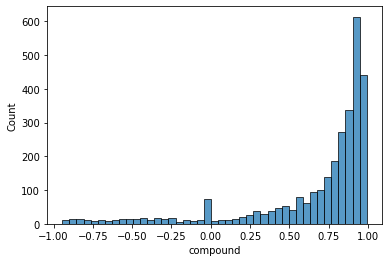

In [28]:
sns.histplot(tourist_2['compound'])

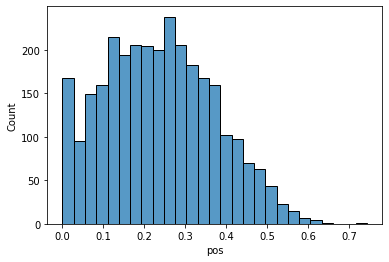

In [29]:
sns.histplot(tourist_2['pos'])

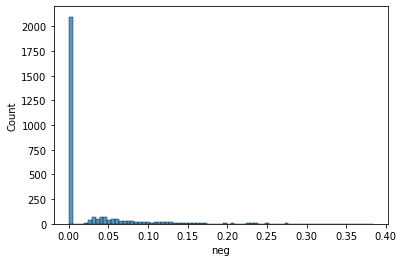

In [30]:
sns.histplot(tourist_2['neg'])

In [33]:
#Calculating how many positive reviews each type of restaurannt have
(tourist_2['compound']>0).groupby(tourist_2['Restaurant_type']).sum()

Restaurant_type
Indian    1131
Thai      1524
Name: compound, dtype: int64

In [37]:
#percentage positive

percent_positive = pd.DataFrame((tourist_2['compound']>0).groupby(tourist_2['Restaurant_type']).sum()
/tourist_2['Restaurant_type'].groupby(tourist_2['Restaurant_type']).count()*100, 
columns = ['% positive reviews']).sort_values(by = '% positive reviews')

percent_positive

,% positive reviews
Restaurant_type,
Indian,87.606507
Thai,90.768314


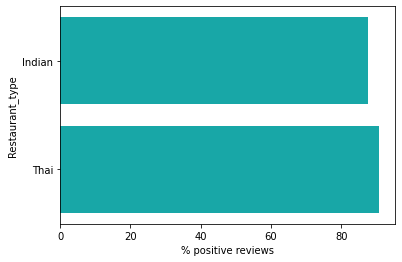

In [39]:
sns.barplot(data = percent_positive, x = '% positive reviews', y = percent_positive.index, color = 'c')

In [77]:
#Wordcloud data prerocessing
tourist_2['processed_review'] = tourist_2['Review'].apply(preprocess_text)

reviews_positive_subset = tourist_2.loc[(tourist_2['Restaurant_type'] == 'Indian, Thai') & (tourist_2['compound']>0),:]

reviews_negative_subset = tourist_2.loc[(tourist_2['Restaurant_type'] == 'Indian, Thai') & (tourist_2['compound']<0),:]

reviews_positive_subset.head()

,ID,Review Date,Location,Restaurant_type,Hotel/Restaurant name,Review,compound,neg,pos,neu,processed_review


In [78]:
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color = 'white').generate(
    ' '.join(pos_tokens))

#Displaying the image
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

ValueError: ignored

In [76]:
#Word frequency using the frequency distribution and frequency distribution plot

from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

ValueError: ignored